# **Cài đặt các thư viện cần thiết để giải quyết vấn đề**

In [17]:
pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Nhập các thư viện đã cài đặt và Load dữ liệu mẫu

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'
# %config InlineBackend.figure_format = 'svg'
# %config InlineBackend.figure_format = 'pdf'
# %config InlineBackend.figure_format = 'png'
# %config InlineBackend.figure_format = 'jpeg'
# %config InlineBackend.figure_format = 'jpg'
# %config InlineBackend.figure_format = 'webp'
# %config InlineBackend.figure_format = 'svgz'
# %config InlineBackend.figure_format = 'eps'

In [19]:
# Load the dataset
df = pd.read_csv('store_sharing.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [20]:
# Display the shape of the dataset
print("Shape of the dataset:", df.shape)
# Display the columns of the dataset
print("Columns in the dataset:", df.columns.tolist())

Shape of the dataset: (17414, 10)
Columns in the dataset: ['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season']


In [21]:
# Display information about the dataset
print("Information about the dataset:")
df.info()

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [22]:
# Display the summary statistics of the dataset
print("Summary statistics of the dataset:")
df.describe()

Summary statistics of the dataset:


,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [23]:
# Display the number of missing values in each column
print("Number of missing values in each column:")
print(df.isnull().sum())

Number of missing values in each column:
timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64


## Làm sạch dữ liệu

> Xử lý các giá trị còn thiếu.

> Kiểm tra các bản sao và loại bỏ chúng nếu tìm thấy.

> Chuẩn hóa tên cột (nếu cần) để có các quy ước đặt tên nhất quán.

> Xác thực các loại dữ liệu và chuyển đổi các cột thành các loại thích hợp nếu cần.

> Nhìn vào kiểu dữ liệu của từng biến, biến đổi dấu thời gian trong kiểu và đặt nó làm chỉ mục.

> Tạo kỹ thuật tính năng. Trích xuất các cột mới (ngày trong tuần, ngày trong tháng, giờ, tháng, mùa, năm, v.v.)

In [24]:
data_columns = {
    'timestamp': 'Thời_gian',
    'cnt': 'Số_lượt_đi',
    't1': 'Nhiệt_độ_thực_tế',
    't2': 'Nhiệt_độ_cảm_giác',
    'hum': '%_Độ_ẩm',
    'wind_speed': 'Tốc_độ_gió_Km/H',
    'weather_code': 'Mã_thời_tiết',
    'is_holiday': 'Là_ngày_lễ',
    'is_weekend': 'Là_cuối_tuần',
    'season': 'Mã_mùa',
}

df.rename(columns=data_columns, inplace=True)

In [25]:
# Đếm số lượng các giá trị duy nhất trong cột 'Mã_thời_tiết'
print("Unique values in 'Mã_thời_tiết':")
df['Mã_thời_tiết'].value_counts()

Unique values in 'Mã_thời_tiết':


Mã_thời_tiết
1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: count, dtype: int64

In [26]:
# Install missingno if not already installed
#%pip install missingno

# Import the missingno library
import missingno as msno

# Biểu đồ cột số lượng giá trị thiếu
msno.bar(df)
plt.show()

ModuleNotFoundError: No module named 'missingno'

In [96]:
# Mã hoá các giá trị trong cột 'Mã_thời_tiết' (label encoding)
# Mã thời tiết
Weather_Code = {
    1.0: '1 : Rõ ràng / Sương mù / Sương mù',
    2.0: '2 : Mây rải rác / Mây ít',
    3.0: '3 : Những đám mây tan vỡ',
    4.0: '4 : Nhiều mây',
    7.0: '7 : Mưa / Mưa rào nhẹ',
    10.0: '10 : Mưa với giông bão',
    26.0: '26 : Tuyết rơi',
    94.0: '94 : Sương mù đóng băng'
}

df['Thời_tiết']= df['Mã_thời_tiết'].map(Weather_Code)

df.head()

,Thời_gian,Số_lượt_đi,Nhiệt_độ_thực_tế,Nhiệt_độ_cảm_giác,%_Độ_ẩm,Tốc_độ_gió_Km/H,Mã_thời_tiết,Là_ngày_lễ,Là_cuối_tuần,Mã_mùa,Thời_tiết
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,3 : Những đám mây tan vỡ
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1 : Rõ ràng / Sương mù / Sương mù
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1 : Rõ ràng / Sương mù / Sương mù
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1 : Rõ ràng / Sương mù / Sương mù
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1 : Rõ ràng / Sương mù / Sương mù


In [97]:
# Đếm số lượng các giá trị duy nhất trong cột 'Mã_mùa'
print("Unique values in 'Mã_mùa':")
df['Mã_mùa'].value_counts()

Unique values in 'Mã_mùa':


Mã_mùa
0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: count, dtype: int64

In [98]:
# Mã hoá các giá trị trong cột 'Mã_mùa' (label encoding)
season_descriptions = {
    0.0: 'Mùa xuân',
    1.0: 'Mùa hè',
    2.0: 'Mùa thu',
    3.0: 'Mùa đông'
}
df['Mùa'] = df['Mã_mùa'].map(season_descriptions)
df.head()

,Thời_gian,Số_lượt_đi,Nhiệt_độ_thực_tế,Nhiệt_độ_cảm_giác,%_Độ_ẩm,Tốc_độ_gió_Km/H,Mã_thời_tiết,Là_ngày_lễ,Là_cuối_tuần,Mã_mùa,Thời_tiết,Mùa
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,3 : Những đám mây tan vỡ,Mùa đông
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1 : Rõ ràng / Sương mù / Sương mù,Mùa đông
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,1 : Rõ ràng / Sương mù / Sương mù,Mùa đông
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,1 : Rõ ràng / Sương mù / Sương mù,Mùa đông
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,1 : Rõ ràng / Sương mù / Sương mù,Mùa đông


In [99]:
df['Mã_mùa'].head()

0    3.0
1    3.0
2    3.0
3    3.0
4    3.0
Name: Mã_mùa, dtype: float64

In [100]:

# Convert the timestamp column to datetime format
df['Thời_gian'] = pd.to_datetime(df['Thời_gian'], format='%Y-%m-%d %H:%M:%S')
# convert object to int 
df['Là_ngày_lễ']= df['Là_ngày_lễ'].astype(int)
df['Là_cuối_tuần']= df['Là_cuối_tuần'].astype(int)
df['Mã_thời_tiết']= df['Mã_thời_tiết'].astype(int)
df['Mã_mùa']= df['Mã_mùa'].astype(int)

In [101]:

#Tạo kỹ thuật tính năng. Trích xuất các cột mới (ngày trong tuần, ngày trong tháng, giờ, tháng, mùa, năm, v.v.)

# Extract date and time features
df['Năm'] = df['Thời_gian'].dt.year
df['Tháng'] = df['Thời_gian'].dt.month
df['Ngày'] = df['Thời_gian'].dt.day
df['Giờ'] = df['Thời_gian'].dt.hour

df.head()

,Thời_gian,Số_lượt_đi,Nhiệt_độ_thực_tế,Nhiệt_độ_cảm_giác,%_Độ_ẩm,Tốc_độ_gió_Km/H,Mã_thời_tiết,Là_ngày_lễ,Là_cuối_tuần,Mã_mùa,Thời_tiết,Mùa,Năm,Tháng,Ngày,Giờ
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,3 : Những đám mây tan vỡ,Mùa đông,2015,1,4,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,1 : Rõ ràng / Sương mù / Sương mù,Mùa đông,2015,1,4,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,1 : Rõ ràng / Sương mù / Sương mù,Mùa đông,2015,1,4,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3,1 : Rõ ràng / Sương mù / Sương mù,Mùa đông,2015,1,4,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3,1 : Rõ ràng / Sương mù / Sương mù,Mùa đông,2015,1,4,4


## Mục tiêu phân tích

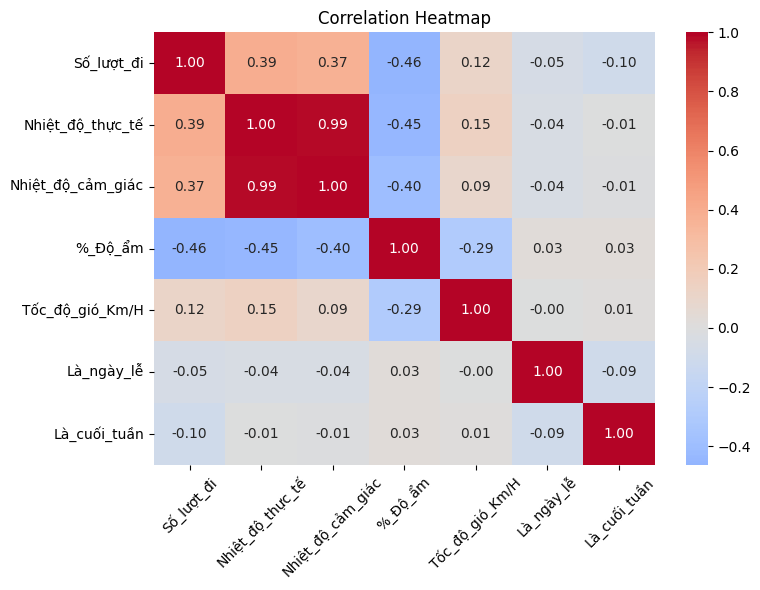

In [102]:
# kiểm tra mỗi tương quan bản đồ nhiệt giữa các biến số
numeric_features =['Số_lượt_đi', 'Nhiệt_độ_thực_tế', 'Nhiệt_độ_cảm_giác', '%_Độ_ẩm', 'Tốc_độ_gió_Km/H', 'Là_ngày_lễ', 'Là_cuối_tuần']

correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Kết luận: Tương quan mạnh: Nhiệt độ thực tế và Nhiệt độ cảm giác có tương quan dương rất mạnh (0.99), gần như là tuyến tính. Điều này dễ hiểu vì nhiệt độ cảm giác thường chịu ảnh hưởng lớn bởi nhiệt độ thực tế

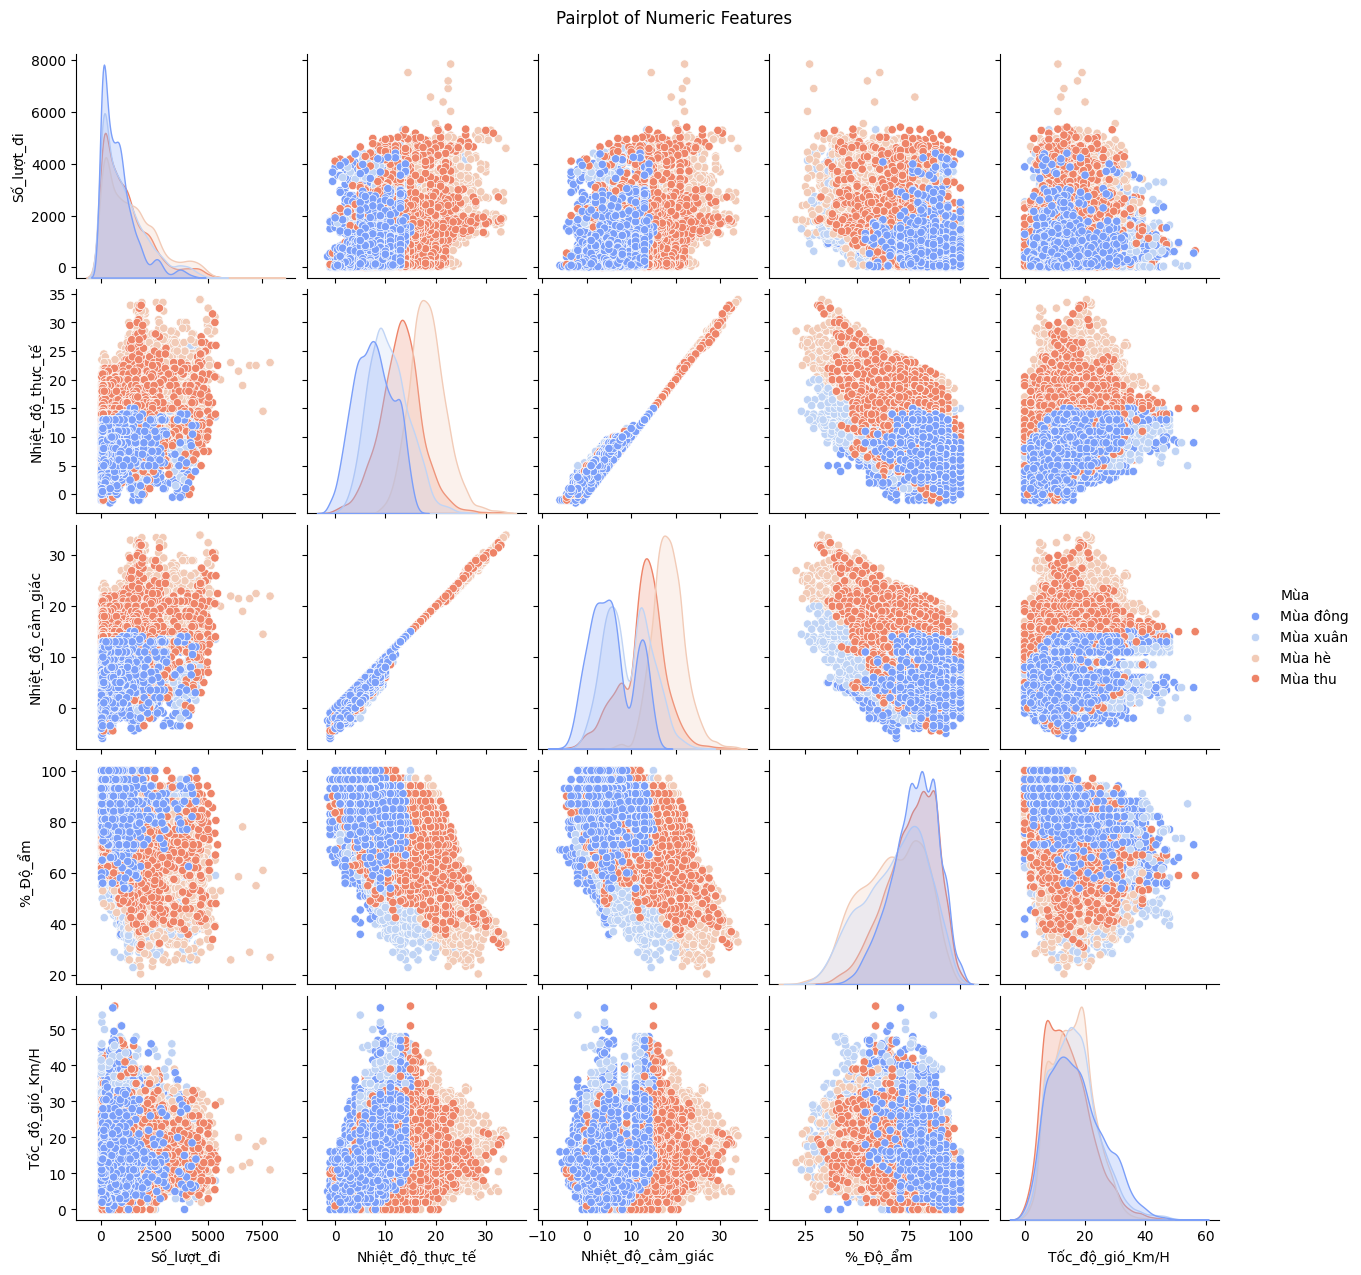

In [103]:
# Hiển thị biểu đồ pairplot

numeric_features =['Số_lượt_đi', 'Nhiệt_độ_thực_tế', 'Nhiệt_độ_cảm_giác', '%_Độ_ẩm', 'Tốc_độ_gió_Km/H','Mùa']
sns.pairplot(df[numeric_features], hue='Mùa', palette='coolwarm', diag_kind='kde', markers='o')
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

Xem số lượt đi là biến mục tiêu
Phân tích biểu đồ phân phối của "Số lượt đi" trong Pairplot:

Quay lại biểu đồ Pairplot bạn đã cung cấp, bạn sẽ thấy biểu đồ phân phối của "Số lượt đi" ở ô đầu tiên trên đường chéo chính (góc trên cùng bên trái). Khi bạn xem xét biểu đồ này, hãy tự hỏi:

Hình dạng của phân phối "Số lượt đi" là gì? Nó có đối xứng không? Nó lệch về bên nào?
Giá trị số lượt đi nào xuất hiện thường xuyên nhất (đỉnh của biểu đồ)?
Phạm vi giá trị của số lượt đi là bao nhiêu?
Có vẻ có nhiều giá trị số lượt đi tập trung ở mức thấp hay mức cao?
Có bất kỳ khoảng trống hoặc đỉnh phụ nào không?
Trả lời: 
Quan sát biểu đồ phân phối của "Số lượt đi":

Khi nhìn vào biểu đồ phân phối của "Số lượt đi", tôi nhận thấy những điều sau:

Hình dạng phân phối: Phân phối này rõ ràng là lệch phải (hoặc lệch dương). Đỉnh của biểu đồ (nơi có tần suất cao nhất) nằm ở các giá trị thấp của "Số lượt đi", và đuôi của biểu đồ kéo dài về phía bên phải, cho thấy có một số lượng nhỏ các chuyến đi có số lượt rất cao.

Giá trị xuất hiện thường xuyên nhất (đỉnh): Đỉnh của biểu đồ nằm ở khoảng giá trị rất thấp, gần như bằng 0. Điều này cho thấy phần lớn các quan sát có số lượt đi thấp.

Phạm vi giá trị: Biểu đồ trải dài từ khoảng 0 đến hơn 7500 (dựa trên trục hoành). Điều này cho thấy sự biến động lớn trong số lượt đi.

Sự tập trung của dữ liệu: Dữ liệu tập trung chủ yếu ở các giá trị thấp của "Số lượt đi". Khi số lượt đi tăng lên, tần suất xuất hiện của các giá trị này giảm đi nhanh chóng.

Khoảng trống và đỉnh phụ: Tôi không thấy có khoảng trống lớn nào trong phân phối. Có vẻ như có một "vai" nhỏ hoặc một đỉnh thứ hai không rõ ràng lắm ở khoảng giá trị thấp hơn 2500, nhưng đỉnh chính vẫn ở gần 0.

Trả lời các câu hỏi:

Hình dạng của phân phối "Số lượt đi" là gì? Phân phối lệch phải (lệch dương).
Giá trị số lượt đi nào xuất hiện thường xuyên nhất (đỉnh của biểu đồ)? Các giá trị rất thấp, gần 0.
Phạm vi giá trị của số lượt đi là bao nhiêu? Khoảng từ 0 đến hơn 7500.
Có vẻ có nhiều giá trị số lượt đi tập trung ở mức thấp hay mức cao? Tập trung chủ yếu ở mức thấp.
Có bất kỳ khoảng trống hoặc đỉnh phụ nào không? Không có khoảng trống lớn, có một "vai" nhỏ hoặc đỉnh phụ không rõ ràng ở khoảng giá trị thấp.
Ý nghĩa phân tích:

Phân tích biểu đồ phân phối của "Số lượt đi" cho thấy rằng phần lớn thời gian, số lượng chuyến đi là tương đối thấp. Tuy nhiên, cũng có những khoảng thời gian hoặc điều kiện dẫn đến số lượng chuyến đi rất cao, tạo ra phần đuôi dài về bên phải của phân phối.

Điều này có thể gợi ý một vài điều:

Có thể có các sự kiện đặc biệt, ngày lễ, hoặc điều kiện thời tiết thuận lợi làm tăng đáng kể số lượt đi.
Có thể có sự khác biệt lớn về nhu cầu di chuyển giữa các thời điểm khác nhau.
Hiểu được sự phân phối của biến mục tiêu là bước quan trọng đầu tiên trong phân tích dữ liệu. Nó giúp chúng ta hình dung được đặc điểm của biến mà chúng ta muốn dự đoán hoặc giải thích, và có thể ảnh hưởng đến việc lựa chọn các phương pháp phân tích và mô hình phù hợp sau này.

In [11]:
!pip install plotly

   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.8 MB ? eta -:--:--
    --------------------------------------- 0.3/14.8 MB ? eta -:--:--
   -- ------------------------------------- 0.8/14.8 MB 2.3 MB/s eta 0:00:07
   ------ --------------------------------- 2.4/14.8 MB 3.9 MB/s eta 0:00:04
   -------------- ------------------------- 5.5/14.8 MB 7.1 MB/s eta 0:00:02
   -------------------------------------- - 14.4/14.8 MB 14.7 MB/s eta 0:00:01
   ---------------------------------------- 14.8/14.8 MB 12.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [105]:
#!pip install --upgrade pip
#!pip install --upgrade nbformat

In [15]:
import plotly.graph_objects as go

def create_correlation_plot(df, features):
    correlations = df[features].corr()['Số_lượt_đi'].sort_values(ascending=True)
    corelations = correlations.drop('Số_lượt_đi')

    fig = go.Figure(
        data=[go.Bar(
            x=corelations,
            y=corelations.index,
            orientation='h',
            name='Correlation with Số lượt đi',
            text=corelations,
            textposition='auto',
            textfont=dict(size=12),
            hoverinfo='text',
            hovertext=corelations,
            marker=dict(color=['blue' if val >=0 else 'red' for val in corelations],
                        line=dict(color='white', width=1))
        )]  
    )
    fig.update_layout(
        title='Mối tương quan giữa các biến số và Số lượt đi',
        xaxis_title='Mỗi tương quan với Số lượt đi',
        yaxis_title='Thuộc tính',
        template='plotly_white',
        yaxis=dict(
            showgrid=True,
            automargin=True
        ),
        xaxis=dict(
            showgrid=True,
            zerolinewidth=1
        ),
    )
    fig.show()

In [ ]:

# Call the function to create the correlation plot
# Define the features to be used for the correlation plot
features = ['Số_lượt_đi', 'Nhiệt_độ_thực_tế', 'Nhiệt_độ_cảm_giác', '%_Độ_ẩm', 'Tốc_độ_gió_Km/H']

# Call the function to create the correlation plot
create_correlation_plot(df, features)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Tóm tắt ý nghĩa:

Biểu đồ tương quan này cho thấy:

Nhiệt độ (thực tế và cảm giác) có tác động tích cực vừa phải đến số chuyến. Thời tiết ấm áp hơn có xu hướng thu hút nhiều người di chuyển hơn.
Độ ẩm có tác động tiêu cực đáng kể đến số chuyến. Độ ẩm cao có xu hướng làm giảm số lượng người di chuyển.
Tốc độ gió có tác động rất nhỏ và không đáng kể theo hướng tích cực đến số chuyến.
Lưu ý quan trọng:

Tương quan không phải là nhân quả: Biểu đồ này chỉ cho thấy mối quan hệ tuyến tính giữa các biến, không chứng minh được mối quan hệ nhân quả. Ví dụ, chúng ta thấy độ ẩm cao liên quan đến số chuyến thấp, nhưng điều này không có nghĩa là độ ẩm cao gây ra việc giảm số chuyến. Có thể có các yếu tố khác liên quan đến cả độ ẩm và số chuyến.
Mối quan hệ phi tuyến tính: Tương quan tuyến tính chỉ đo lường mối quan hệ tuyến tính. Nếu có mối quan hệ phi tuyến tính (ví dụ: số chuyến tăng lên đến một nhiệt độ tối ưu rồi giảm xuống), biểu đồ này có thể không phản ánh đầy đủ mối quan hệ đó.

## Mối quan hệ của biến "Số lần đi" với các biến khác

In [113]:
import plotly.express as px
def create_scatter_plot(df, x_feature, y_feature):
    fig = px.line(df, x=x_feature, y=y_feature,
                     title=f'Biểu đồ line giữa {x_feature} và {y_feature}',
                     labels={x_feature: x_feature, y_feature: y_feature},
                     template='plotly_white')
    fig.update_traces(marker=dict(size=5))

    fig.update_layout(
        title=f'Biểu đồ phân tán giữa {x_feature} và {y_feature}',
        xaxis_title=x_feature,
        yaxis_title=y_feature,
        hovermode='closest',
        margin=dict(l=40, r=40, t=40, b=40),
        height=600,
        width=800
    )
    fig.show()
# Call the function to create the scatter plot
x_feature = 'Thời_gian'
y_feature = 'Số_lượt_đi'

dayyear = df.groupby(x_feature)[y_feature].mean().reset_index()

create_scatter_plot(dayyear, x_feature, y_feature)

In [27]:
#Điểm đỉnh và xu hướng thay đổi chung

import plotly.express as px

def create_correlation_line():
    